In [49]:
#from pycaret.classification import *
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import random
import lightgbm as lgb
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
import collections

warnings.filterwarnings(action='ignore')

PATH = '../data/'
def make_days(x):
    # string 타입의 Time column을 datetime 타입으로 변경
    x     = str(x)
    year  = int(x[:4])
    month = int(x[4:6])
    day   = int(x[6:8])
    return (dt.date(year, month, day) - dt.date(2020, 10, 31)).days

def make_hours(x):
    x     = str(x)
    #print(X)
    return int(x[8:10])



def string2num(x):
    # (,)( )과 같은 불필요한 데이터 정제
    x = re.sub(r"[^\-0-9\.]+", '', str(x))
    if x =='':
        return -1
    else:
        return int(float(x))

    
def remain_fw4(x):
    fw = str(x)
    if len(fw) > 5:
        return fw[0:5]
    return fw

def qualitys(x):
    if  int(x) == 0:
        return 0
    if int(x)  == -1:
        return 1
    return 2

In [2]:
train_err = pd.read_csv(PATH+'train_err_data.csv')
train_err['days'] = train_err['time'].apply(make_days)

train_quality = pd.read_csv(PATH+'train_quality_data.csv')
train_prob = pd.read_csv(PATH+'train_problem_data.csv')
problem = np.zeros(15000)
problem[train_prob.user_id.unique()-10000] = 1 


In [3]:
train_err['days'] = train_err['time'].apply(make_days)
train_err['hours'] = train_err['time'].apply(make_hours)
train_quality['days'] = train_quality['time'].apply(make_days)
train_quality['hours'] = train_quality['time'].apply(make_hours)


In [5]:
for i in tqdm(range(0,13,1)):
    train_quality['quality_' + str(i)] = train_quality['quality_' + str(i)].apply(lambda x: string2num(x)).astype(float)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:15<00:00,  1.16s/it]


In [50]:
train_quality["quality_0_n"] = train_quality["quality_0"].apply(qualitys)

In [69]:
error = np.zeros((15000,33, 42))

id_error = train_err[["user_id","days","errtype"]].values

for i, d, e in tqdm(id_error):
    user_index = i-10000
    error[user_index, d, e-1]+=1

100%|██████████████████████████████████████████████████████████████████| 16554663/16554663 [00:47<00:00, 348191.48it/s]


100%|██████████████████████████████████████████████████████████████████████| 828624/828624 [00:04<00:00, 185028.59it/s]


In [63]:
for i in range(13):
    train_quality["quality_"+str(i)+ "_n"] = train_quality["quality_"+str(i)].apply(qualitys)

100%|██████████████████████████████████████████████████████████████████████| 828624/828624 [00:04<00:00, 203980.57it/s]


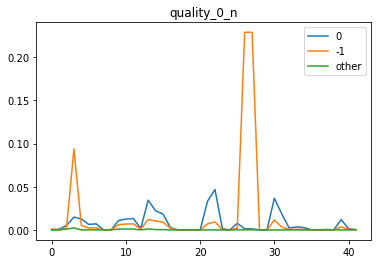

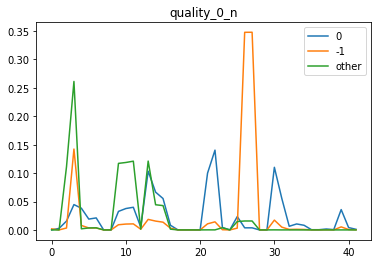

100%|██████████████████████████████████████████████████████████████████████| 828624/828624 [00:04<00:00, 201074.98it/s]


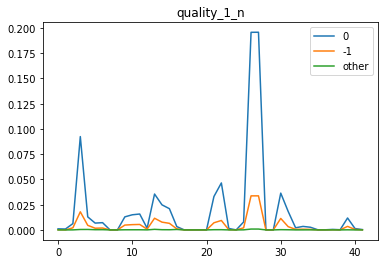

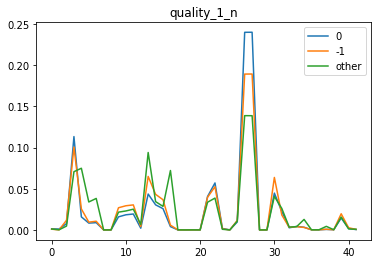

100%|██████████████████████████████████████████████████████████████████████| 828624/828624 [00:04<00:00, 202820.07it/s]


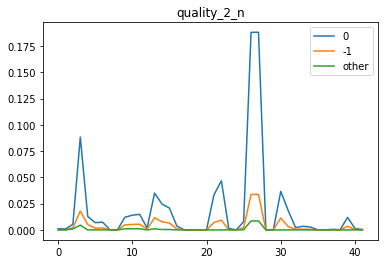

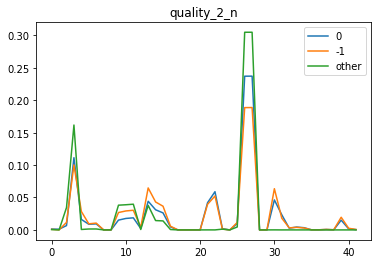

100%|██████████████████████████████████████████████████████████████████████| 828624/828624 [00:04<00:00, 202204.96it/s]


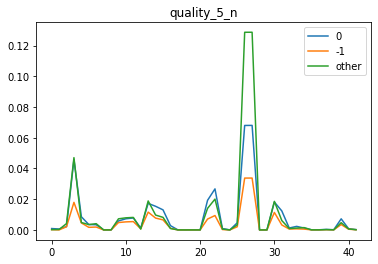

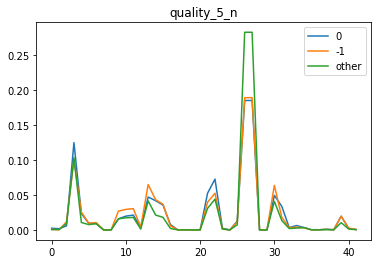

100%|██████████████████████████████████████████████████████████████████████| 828624/828624 [00:04<00:00, 202222.33it/s]


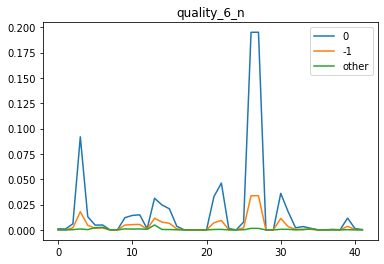

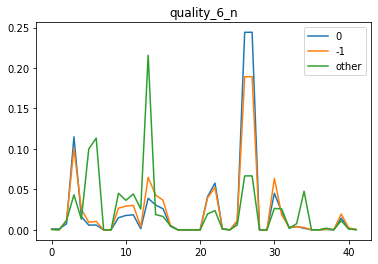

100%|██████████████████████████████████████████████████████████████████████| 828624/828624 [00:04<00:00, 201422.68it/s]


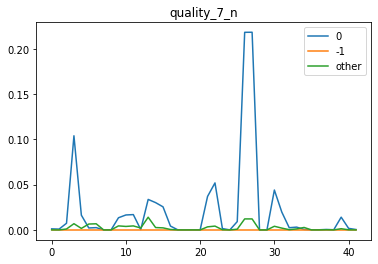

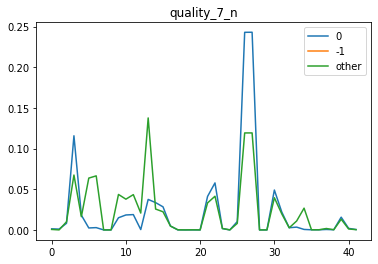

100%|██████████████████████████████████████████████████████████████████████| 828624/828624 [00:04<00:00, 202599.01it/s]


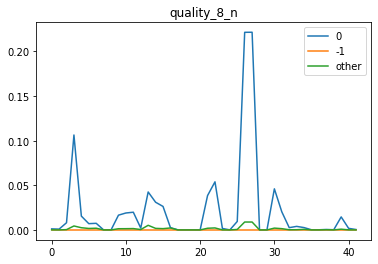

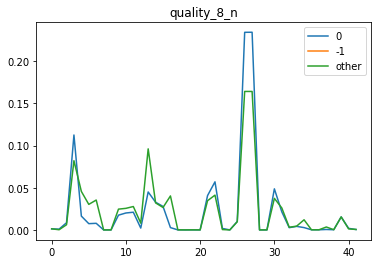

100%|██████████████████████████████████████████████████████████████████████| 828624/828624 [00:04<00:00, 199260.67it/s]


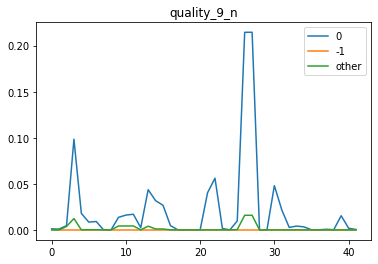

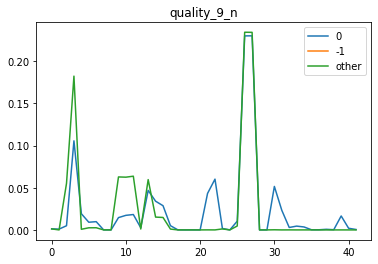

100%|██████████████████████████████████████████████████████████████████████| 828624/828624 [00:04<00:00, 202101.52it/s]


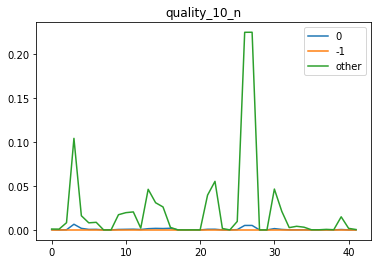

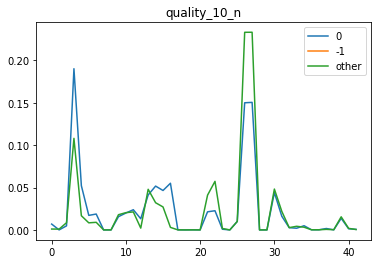

100%|██████████████████████████████████████████████████████████████████████| 828624/828624 [00:04<00:00, 201759.21it/s]


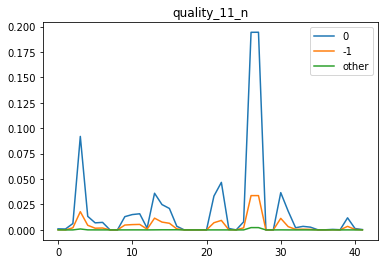

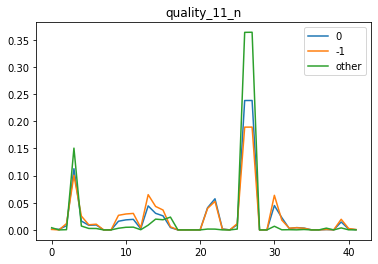

100%|██████████████████████████████████████████████████████████████████████| 828624/828624 [00:04<00:00, 203588.32it/s]


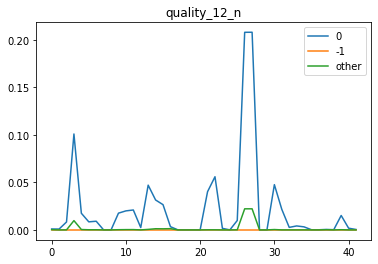

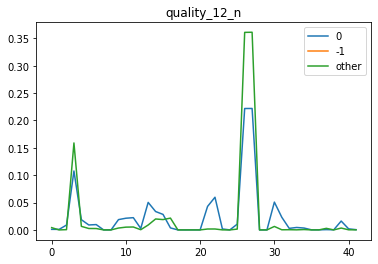

In [70]:
for i in range(13):
    if i == 3 or i ==4:
        continue
    co = "quality_" + str(i)+"_n"
    id_quality = train_quality[["user_id","days",co]].values
    error_q = np.zeros((3, 42))
    #quality_index = train_quality[co].unique().tolist()

    for u,d, q in tqdm(id_quality):
        user_index = u-10000
        error_q[q] = error_q[q] + error[user_index][d]
    quality_error(error_q, co)

In [ ]:
def quality_error(error_q, title):
    total = np.sum(error_q[i],axis = 0) + np.sum(error_q[1],axis = 0) +np.sum(error_q[2],axis = 0)
    plt.plot(np.arange(42), error_q[0] / total ,np.arange(42), error_q[1]/total, np.arange(42),error_q[2]/total)
    plt.legend(["0","-1", "other"])
    plt.title(title)
    plt.show()
    
    plt.plot(np.arange(42), error_q[0] / np.sum(error_q[0],axis = 0) ,np.arange(42), error_q[1]/np.sum(error_q[1],axis=0), np.arange(42),error_q[2]/np.sum(error_q[2],axis=0))
    plt.legend(["0","-1", "other"])
    plt.title(title)
    plt.show()
    
    
    